<a href="https://colab.research.google.com/github/lindaperez/2024_KaggleGettingStarted/blob/main/Titanic2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of the analysis is to predict who is more likely to survive and who is not in a shipwreck similar to Titanic, based on the variables about the tripulants.

- Is there any relationship betweeen age and another variable like class
- Is there anyt relationship with cabin and another variable
- is there any association between the class,name, ticket fair, embarked, etc and the likelyhood of surving

In [ ]:
#imports
import pandas as pd # Manipulation Analysis and Exploration
from IPython.display import display # Display the data
from sklearn.preprocessing import LabelEncoder #Change categorical variables into numerical variables
import matplotlib.pyplot as plt  #visualizations
from google.colab import drive #Google drive mounting
import numpy as np
from collections import defaultdict
import seaborn as sns
#paths

# Replace 'your_file.csv' with the path to your CSV file
train_path = '/content/drive/MyDrive/train.csv'
test_path = '/content/drive/MyDrive/test.csv'

0.- Upload Data into Google Colab Mounting Google Drive.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Overview of the Data
It is importan to see the amount of data that we are going to work with, types and missing values to have an idea about our next steps to analyze it.

* Shape
* Data Types
* Missing Values/ NAs

In [ ]:
# Read the CSV file into a DataFrame
raw_train_df = pd.read_csv(train_path)

# Display the DataFrame as a table
display(raw_train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Print the shape
print("Number of rows:", raw_train_df.shape[0])
print("Number of columns:", raw_train_df.shape[1])


Number of rows: 891
Number of columns: 12


1.- Lets check the data type of each column:

In [ ]:
# Check the data types of each column
data_types = raw_train_df.dtypes

# Print the data types of each column
print("Data types of each column:")
print(data_types)

Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Notes:
- Changing the datatypes can help of to remove inconsistencies like for example a name filled with a number.
- Generate statistics about survivors, pclasses , sex, gender
- Ticket, will be interesting to separate the numbers from ticket's strings for patterns.


In [ ]:
# Convert 'name' column to string if it contains only string values
if raw_train_df['Name'].apply(lambda x: isinstance(x, str)).all():
    raw_train_df['Name'] = raw_train_df['Name'].astype(str)
else:
    print("Warning: 'name' column contains non-string values and cannot be converted.")
# Convert Sex to int64 where male is 1 and female is 0
raw_train_df['Sex'] = raw_train_df['Sex'].replace({'female': 0, 'male': 1})
# Check the data types after conversion
print("\nAfter conversion:")
print(raw_train_df.dtypes)


After conversion:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


2.- Checking for Missing Values
- Nulls/Empty
- NAs

In [ ]:
# Identify missing values
missing_values = raw_train_df.isnull().sum()
# Find the count of missing values (NaNs) in each column
missing_values_per_column = raw_train_df.isna().sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

# Print the count of missing values (NaNs) in each column
print("Missing values (NaNs) in each column:")
print(missing_values_per_column)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values (NaNs) in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Notes:
- Age 20% Nulls
- Cabin 80% Nulls

Lets check embarked missing values


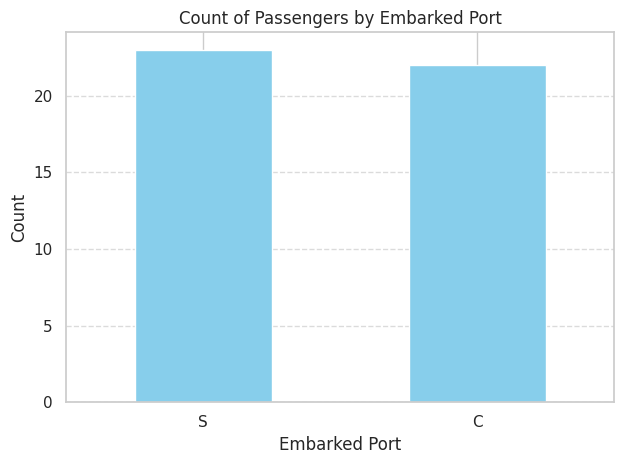

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
raw_train_df[raw_train_df['Embarked'].isnull()==True]
# Assuming 'df' is your DataFrame containing the 'Cabin' column

# Filter the DataFrame
filtered = raw_train_df[raw_train_df['Cabin'].notna() & raw_train_df['Cabin'].str.startswith('B')]
# Assuming 'data' is your DataFrame and 'Embarked' is the column of interest
embarked_counts = filtered['Embarked'].value_counts()

# Plotting the bar plot
embarked_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
raw_train_df[raw_train_df['Embarked'].isnull()==True]['Embarked'].replace({np.NAN: 'S'})
raw_train_df.loc[raw_train_df['Embarked'].isnull(), 'Embarked'] = 'S'
raw_train_df[raw_train_df['Embarked'].isnull()==True]
#raw_train_df.isna().sum()

### Univariate Analysis

Variables of Interests:
- No. PassengerId       int64   Discrete
- Target. Survived      int64.  Cat - Binary
- Yes. Pclass           int64.  Cat - Ordinal
- Yes. Name            object.  Cat - Nominal
- Yes. Sex             object.  Cat - Nominal
- Yes. Age            float64.  Num - Continuous
- Yes. SibSp            int64.  Num - Discrete
- Yes. Parch            int64.  Num - Discrete
- Yes. Ticket          object.  Cat - Nominal
- Yes. Fare           float64.  Num - Continuous
- Yes. Cabin           object.  Cat - Nominal
- Yes. Embarked        object.  Cat - Nominal

1.- Central Tendency, Dispersion and Shape for numerical variables.

In [ ]:
# Specify the numerical variables you want to include
numerical_variables = [ 'Age','SibSp','Parch','Fare']

# Calculate summary statistics for specific numerical variables
summary_statistics_specific = raw_train_df[numerical_variables].describe()

# Print the summary statistics for specific numerical variables
print(summary_statistics_specific)


              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


* **Ages**:  There are 714 non-null observation which represent the 80%. The mean of ages is around 29.7 years old. The youngest passager is 0.42 (infant), the oldest passager is 80 years old. The median age (50% percentile) is 28 years meaning that half of the passengers are younger than 28 years and half are older. The interquartile range (IQR) is approximately 18.9 years, indicating that half of the individuals are between approximately 20.1 years and 38 years old. And 97% of the observations are between 0-60 years.

* **Siblings and Sposes (SibSp)** The dataset defines family relations {Sibling : brother, sister, stepbrother, stepsister, Spouse : husband, wife (mistresses and fiancés were ignored}. 100% of the observations are present with an average of 0.52 siblings/sposes aboard. The maximun number of sibling/spose aboard for a passenger is 8. 50% of the passangers does not have any sibling/spose aboard and 75% of the passengers travel with one spose/sibling aboard. 97% of the passengers are between 0-3 sposes/siblings.A potential left skewed distribution since the variability is high.

* **Parents and Children (Parch):** there are also 891 non-null observations, with an average of approximately 0.38 parents/children aboard. The maximum number of parents/children aboard for a passenger is 6. 75% of the passengers does not have any parents/children aboard. 97% of the passengers are between 0-1.92 sposes/siblings.A potential left skewed distribution since the variability is high.

* **Passenger Fare:** 100% observations are present, with an average fare of approximately 32.20. The fare varies widely, ranging from 0 to 512.33, with the median fare being 14.45. The average fare paid by passengers is approximately 32.20, with a standard deviation of approximately $49.69, indicating significant variability in fare prices. The minimum fare is 0.00, indicating that some passengers may have traveled for free or received complementary tickets. The maximum fare is 512.33, suggesting that some passengers paid significantly more for premium accommodations or special services. 75% of the passengers pay less than 31 for each ticket. A potential left skewed distribution the spread of the data is wide.


1.1.- Central Tendency, Dispersion and Shape Visualization

* Histogram: Displays the distribution of values.
* Box plot: Illustrates the central tendency, variability, and potential outliers.
* Density plot: Shows the probability density of the data over a continuous interval.
* QQ plot: Compares the distribution of the data to a theoretical distribution (e.g., normal distribution).

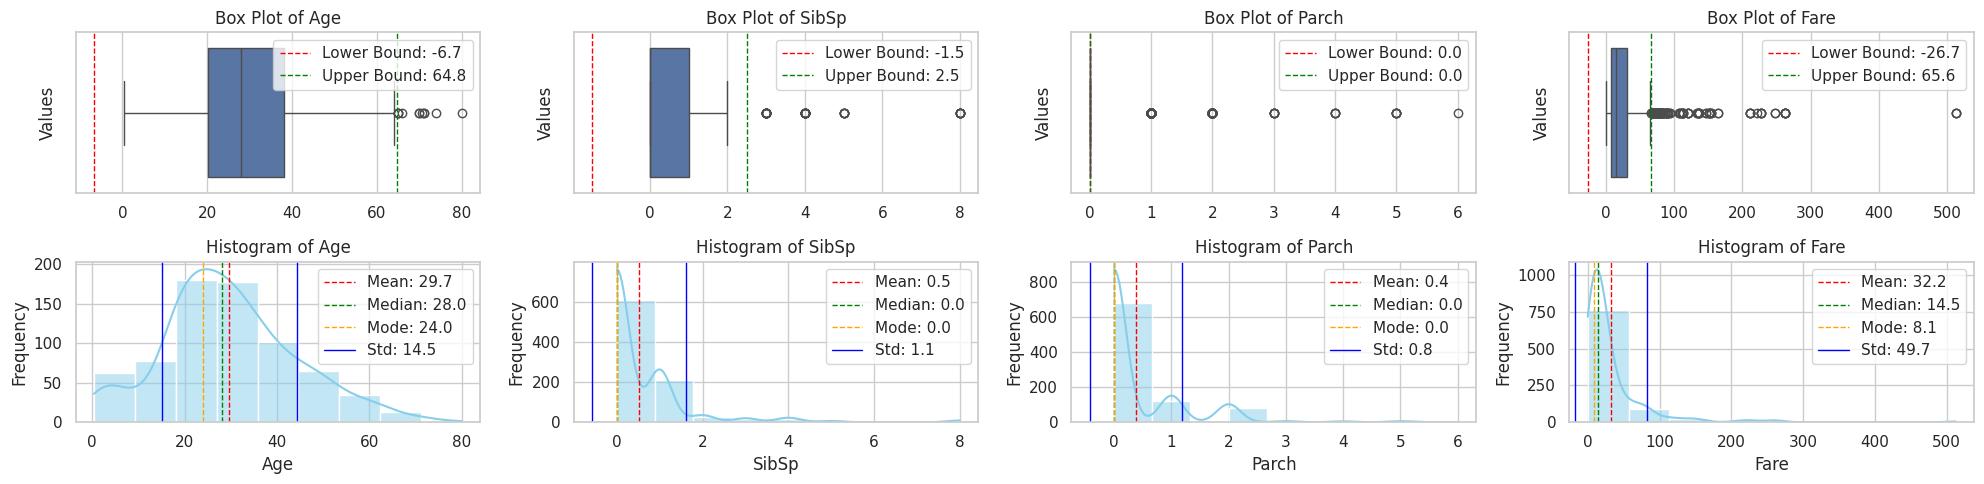

In [ ]:
# List of numerical variables
numerical_variables = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a figure with a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

# Iterate over each numerical variable
for i, column in enumerate(numerical_variables):
    numeric_values = pd.to_numeric(raw_train_df[column], errors='coerce').dropna()

     # Calculate lower bound and upper bound
    Q1 = numeric_values.quantile(0.25)
    Q3 = numeric_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add box plot to the subplot in the first row
    sns.boxplot(x=raw_train_df[column], ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {column}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Values')

    # Plot vertical lines for lower bound and upper bound
    axes[0, i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.1f}')
    axes[0, i].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.1f}')

    # Add legend to the box plot
    axes[0, i].legend()

    # Add histogram with distribution plot to the subplot in the second row
    sns.histplot(raw_train_df[column], kde=True, color='skyblue', bins=9, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')

    # Calculate mean, median, mode, and standard deviation
    mean_ = raw_train_df[column].mean()
    median_ = raw_train_df[column].median()
    mode_ = raw_train_df[column].mode().values[0]
    std_ = raw_train_df[column].std()

    # Plot vertical lines for mean, median, mode, and standard deviation on the histogram subplot
    axes[1, i].axvline(mean_, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_:.1f}')
    axes[1, i].axvline(median_, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_:.1f}')
    axes[1, i].axvline(mode_, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_:.1f}')
    axes[1, i].axvline(mean_ + std_, color='blue', linestyle='solid', linewidth=1, label=f'Std: {std_:.1f}')
    axes[1, i].axvline(mean_ - std_, color='blue', linestyle='solid', linewidth=1)

    # Add legend to the histogram subplot
    axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* **Ages**:  The distribution appears slightly right-skewed, as the tail extends more to the right, but the skewness is relatively small.
The kurtosis value suggests that the distribution has moderate tails compared to a normal distribution, indicating some outliers or heavier tails.There are some outliers with values above 65 older than the majority of passengers.

* **Siblings and Sposes (SibSp)** The distribution is positively skewed with a long tail towards higher values.The presence of positive skewness suggests that there were relatively few passengers with a larger number of siblings/spouses which families traveling together. Additionally, there are some outliers with values above 2, which represent individuals with a larger number of siblings/spouses than the majority of passengers.

* **Parents and Children (Parch):** The distribution positively skewed with a long tail towards higher values.The presence of positive skewness suggests that there were relatively few passengers with a larger number of parents/children, potentially indicating families traveling together. The range of the variable spans from 0 to 6, with an interquartile range of 0 to 0, indicating that most passengers had few or no parents/children aboard. Additionally, there are some outliers with values above 2, which represent individuals with a larger number of parents/children than the majority of passengers."

* **Passenger Fare:** The distribution has Positive skewness, a longer tail to the right towards higher values. The distribution of fares is likely positively skewed, as indicated by the difference between the mean ($32.20) and the median ($14.45). A positive skew suggests that there are relatively few passengers who paid very high fares, which pull the mean upwards, resulting in a higher mean than median.

How much people is greater of 64.8  

2.- Frequencies and proporsion for categoricals
* Survived
* Pclass
* Sex
* Embarked
* Cabin
* Ticket

In [ ]:
results = pd.DataFrame()

# Iterate over each column in the DataFrame
for column in raw_train_df.columns:
    if column not in numerical_variables and column not in {'PassengerId','Name','Ticket', 'Cabin'}:

      # Calculate frequencies and proportions for the column
      frequencies = raw_train_df[column].value_counts()
      proportions = raw_train_df[column].value_counts(normalize=True)

      # Concatenate frequencies and proportions into a single DataFrame
      result = pd.concat([frequencies, proportions], axis=1)
      result.columns = ['Frequency', 'Proportion']

      # Add a column for the column name
      result['Column'] = column

      # Reset the index to make categories as a column
      result.reset_index(inplace=True)
      result.rename(columns={'index': 'Category'}, inplace=True)

      # Append the results to the main DataFrame
      results = pd.concat([results, result], ignore_index=True)

# Display the results DataFrame
display(results)

,Category,Frequency,Proportion,Column
0,0,549,0.616162,Survived
1,1,342,0.383838,Survived
2,3,491,0.551066,Pclass
3,1,216,0.242424,Pclass
4,2,184,0.206510,Pclass
5,1,577,0.647587,Sex
6,0,314,0.352413,Sex
7,S,646,0.725028,Embarked
8,C,168,0.188552,Embarked
9,Q,77,0.086420,Embarked


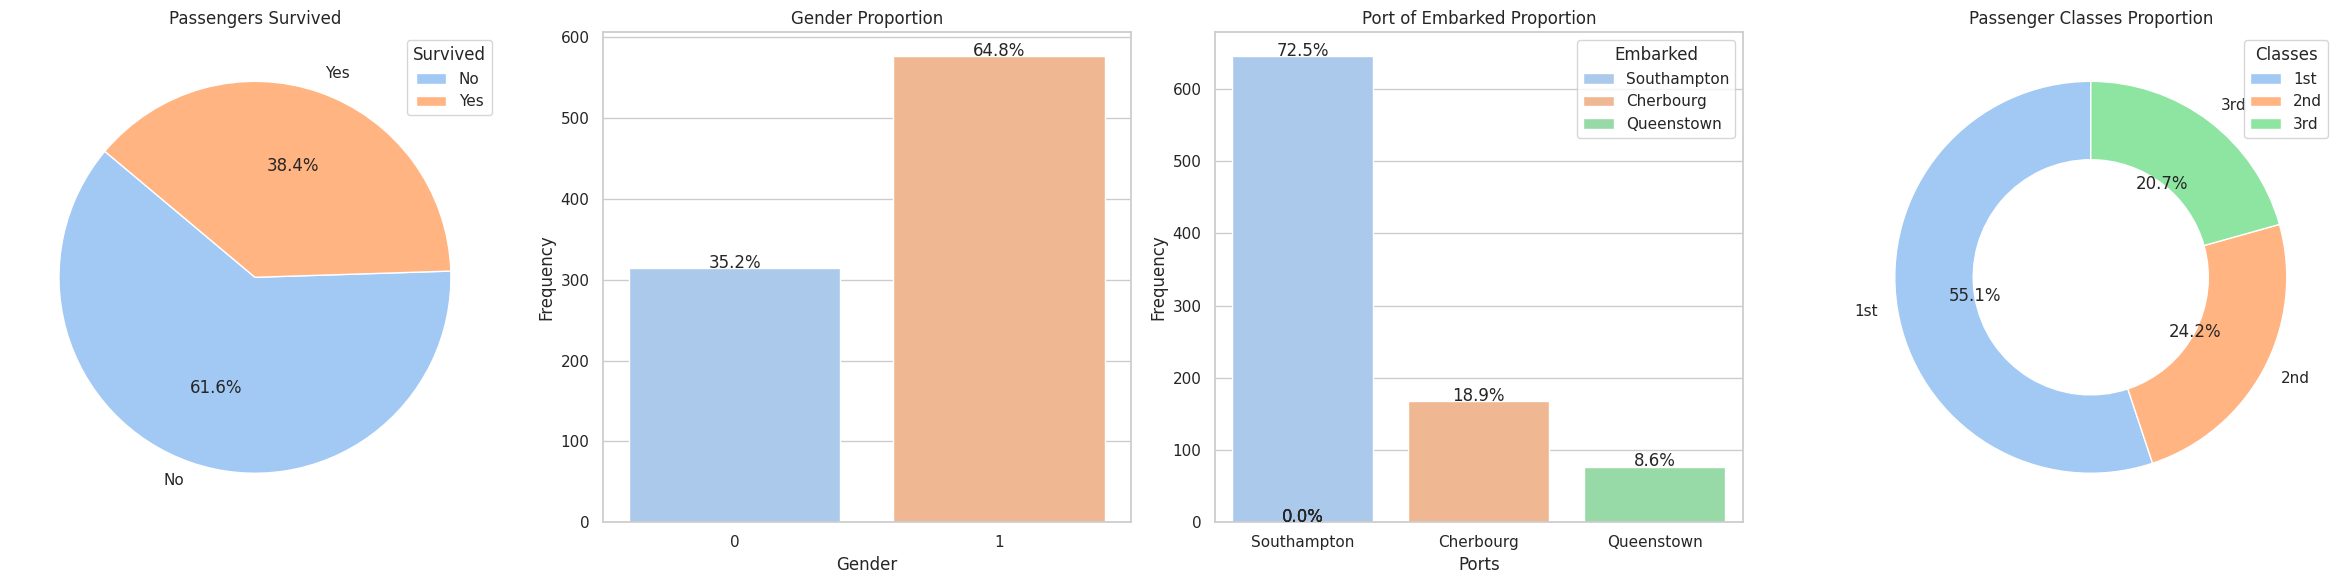

In [ ]:
# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Adjusted figsize to fit all plots in one row

# Define color palette
colors = sns.color_palette('pastel')

# Pie Chart for 'Survived'
category_counts_survived = raw_train_df['Survived'].value_counts()
axes[0].pie(category_counts_survived, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Passengers Survived')
axes[0].legend(title='Survived', loc='upper right')

# Bar Plot for 'Sex'
sns.countplot(data=raw_train_df, x='Sex', hue='Sex', ax=axes[1], palette='pastel', legend=False)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Gender Proportion')
total = len(raw_train_df['Sex'])
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.1f}%'.format((height / total) * 100), ha="center")

# Change 'Embarked' labels
raw_train_df['Embarked'] = raw_train_df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Count Plot for 'Embarked'
sns.countplot(data=raw_train_df, x='Embarked', hue='Embarked', ax=axes[2], palette='pastel', legend=True)
axes[2].set_xlabel('Ports')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Port of Embarked Proportion')
total = len(raw_train_df['Embarked'])
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2., height + 0.2, '{:.1f}%'.format((height / total) * 100), ha="center")

# Donut Chart for 'Pclass'
category_counts_pclass = raw_train_df['Pclass'].value_counts()
axes[3].pie(category_counts_pclass, labels=['1st', '2nd', '3rd'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
axes[3].set_title('Passenger Classes Proportion')

# Create custom legend for 'Pclass' donut chart
axes[3].legend(title='Classes', loc='upper right', labels=['1st', '2nd', '3rd'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* Survived: 38% of the passengers in the dataset survived the Titanic disaster, while 62% did not. This indicates that a larger proportion of passengers did not survive compared to those who survived.

* Gender: 65% of the passengers in the dataset are male, while 35% are female.
This suggests that there are more male passengers compared to female passengers in the dataset.

* Port of Embark: 72% of the passengers in the dataset embarked from Southampton, 19% from Cherbourg, and 9% for Queenstown.
This suggests that there are more passengers that embarked from Southampton than from Cherbourg or Queentown.

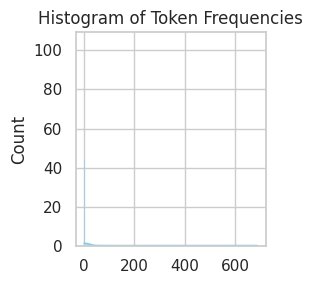

In [ ]:
raw_train_df['Cabin'] = raw_train_df['Cabin'].astype(str)
# Initialize an empty dictionary to store token frequencies
token_freq = defaultdict(int)

# Iterate over each value in the column
for value in raw_train_df['Cabin']:
    # Split the value by space
      tokens = value.split()
      # Count the frequency of each token
      for token in tokens:
          token_freq[token] = token_freq.get(token, 0) + 1

# Convert the dictionary to a set
token_set = set(token_freq.items())
# Assuming df is your DataFrame and 'cabin' is the column containing token frequencies
token_freq_series = pd.Series(token_freq)
cabin_token_freq = token_freq_series.value_counts()


# Assuming token_freq_series is your Series containing token frequencies
plt.figure(figsize=(5, 3))


# Create subplot for the histogram
plt.subplot(1, 2, 2)
sns.histplot(token_freq_series, kde=True, color='skyblue')
plt.title('Histogram of Token Frequencies')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#Bivariate Analysis

##Survived by sex, age, pclass, embarked

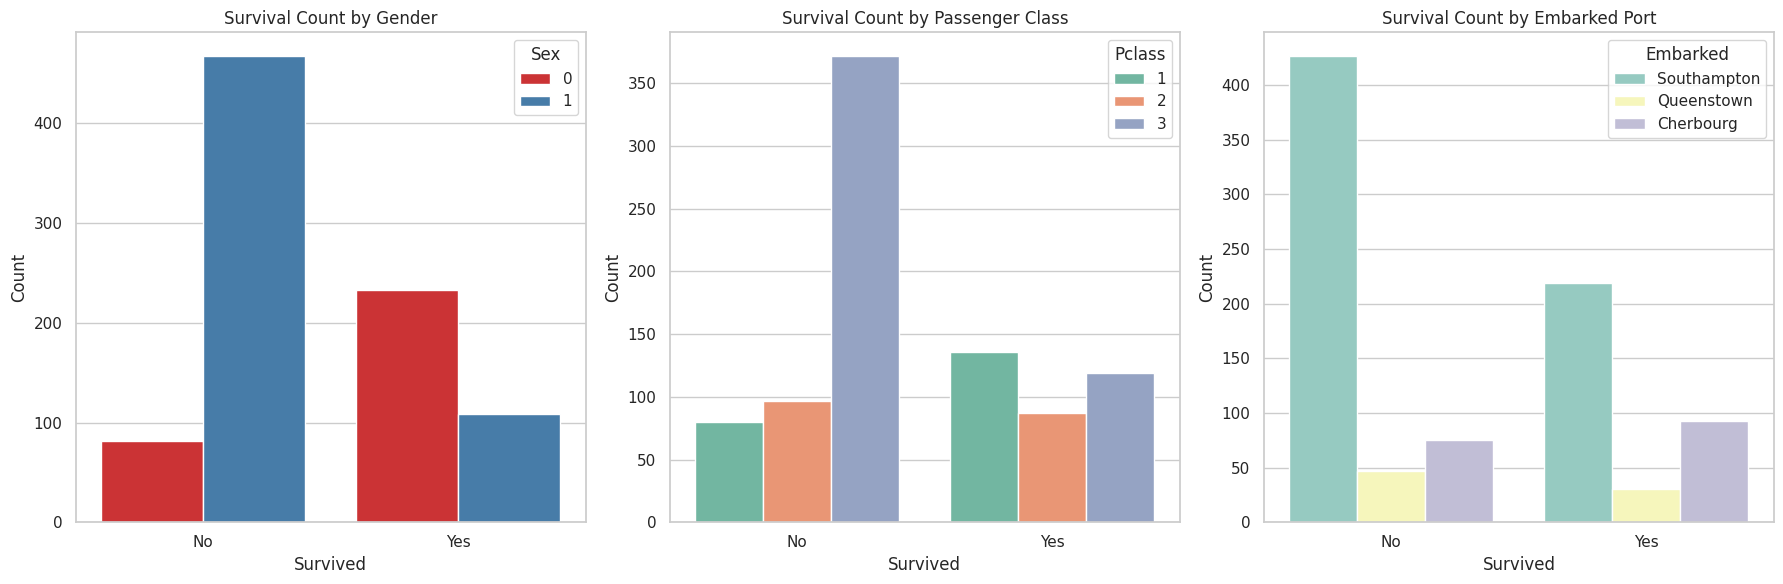

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for survival count by gender
sns.countplot(data=raw_train_df, x='Survived', hue='Sex', palette='Set1', ax=axes[0])
axes[0].set_title('Survival Count by Gender')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].legend(title='Sex')

# Plot for survival count by passenger class
sns.countplot(data=raw_train_df, x='Survived', hue='Pclass', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Passenger Class')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].legend(title='Pclass')

# Plot for survival count by embarked port
sns.countplot(data=raw_train_df, x='Survived', hue='Embarked', palette='Set3', ax=axes[2])
axes[2].set_title('Survival Count by Embarked Port')
axes[2].set_xlabel('Survived')
axes[2].set_ylabel('Count')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No', 'Yes'])
axes[2].legend(title='Embarked')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


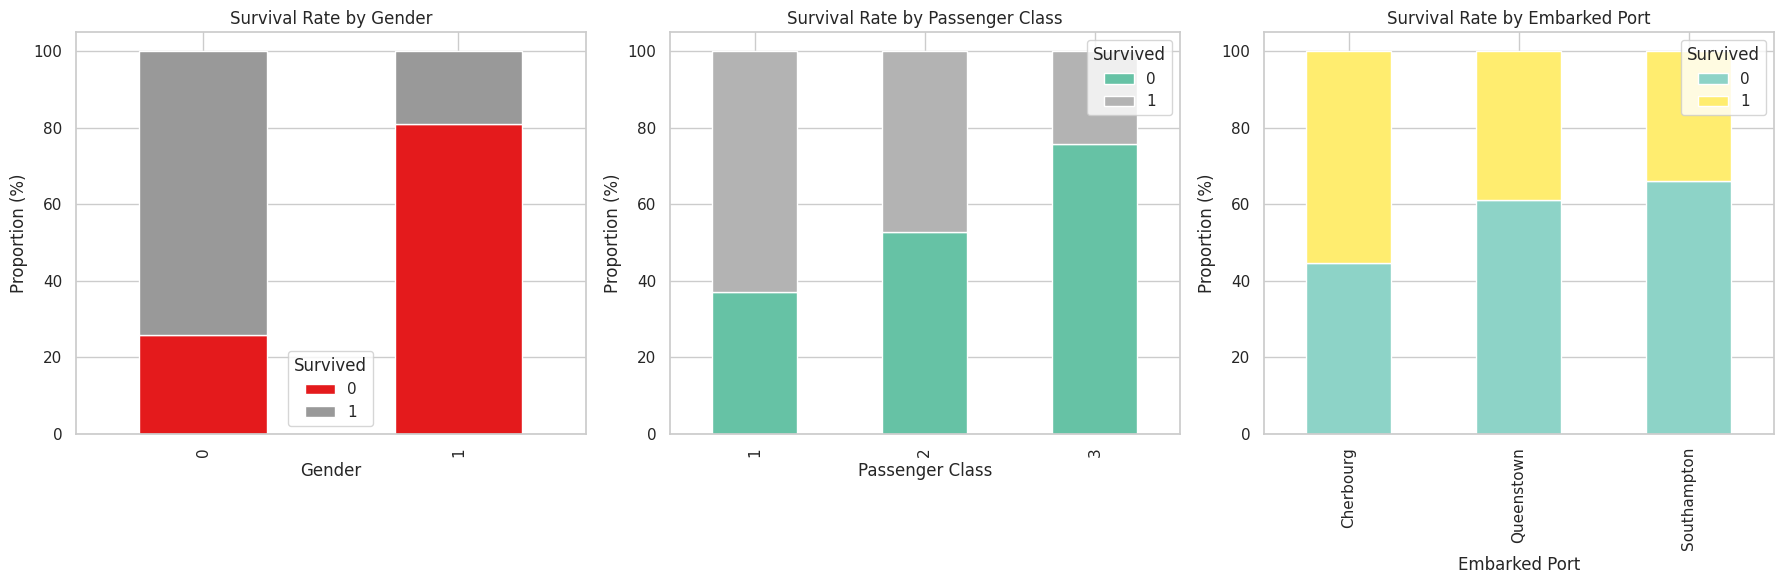

In [ ]:
# Define the mapping for survival labels
#survival_mapping = {0: 'No', 1: 'Yes'}

# Map survival labels in the DataFrame
#raw_train_df['Survived'] = raw_train_df['Survived'].map(survival_mapping)

# Calculate survival rates by gender
survival_rate_gender = raw_train_df.groupby(['Sex', 'Survived']).size().unstack()
survival_rate_gender = survival_rate_gender.div(survival_rate_gender.sum(axis=1), axis=0) * 100

# Calculate survival rates by passenger class
survival_rate_class = raw_train_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_rate_class = survival_rate_class.div(survival_rate_class.sum(axis=1), axis=0) * 100

# Calculate survival rates by embarked port
survival_rate_embarked = raw_train_df.groupby(['Embarked', 'Survived']).size().unstack()
survival_rate_embarked = survival_rate_embarked.div(survival_rate_embarked.sum(axis=1), axis=0) * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot survival rates by gender
survival_rate_gender.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set1')
axes[0].set_title('Survival Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion (%)')

# Plot survival rates by passenger class
survival_rate_class.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Proportion (%)')

# Plot survival rates by embarked port
survival_rate_embarked.plot(kind='bar', stacked=True, ax=axes[2], colormap='Set3')
axes[2].set_title('Survival Rate by Embarked Port')
axes[2].set_xlabel('Embarked Port')
axes[2].set_ylabel('Proportion (%)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* Woman had prevalence to survive 74% of woman survived, while only 19% of man could stay alive.  

* The higher the class the highest the possibility to survive. 63% of the passengers could survive from class 1, while 48% could stay alive from class 2 and only 24% could prevail.

* Cherbourg 55% had more tendency for people to stay alive while
Queenstown 39% and Southampton 34% did have the same chance.

##Survival per number of cabin per passenger

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumCabins
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,nan,Southampton,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,nan,Southampton,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Southampton,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,nan,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,nan,Southampton,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,Southampton,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,nan,Southampton,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,Cherbourg,1


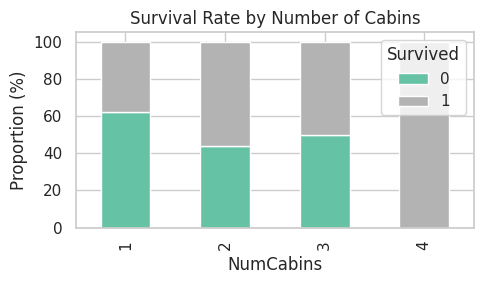

In [ ]:
import pandas as pd

# Split the 'Cabin' values by space and calculate the number of cabins
raw_train_df['NumCabins'] = raw_train_df['Cabin'].apply(lambda x: len(str(x).split()))
display(raw_train_df)


# Calculate survival rates by NumCabins
survival_rate_NumCabins = raw_train_df.groupby(['NumCabins', 'Survived']).size().unstack()
survival_rate_NumCabins = survival_rate_NumCabins.div(survival_rate_NumCabins.sum(axis=1), axis=0) * 100

# Create subplots
fig, axe = plt.subplots(1,figsize=(5, 3))

# Plot survival rates by NumCabins
survival_rate_NumCabins.plot(kind='bar', stacked=True, ax=axe, colormap='Set2')
axe.set_title('Survival Rate by Number of Cabins')
axe.set_xlabel('NumCabins')
axe.set_ylabel('Proportion (%)')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## For A future and deepest understanding

 We can explore separating Tickets, Cabins, Names, Aliases, Generating a graph of people where they are connected by Tickets or Cabin to see deepest patterns.

In [ ]:
train_df= raw_train_df

Separate Ticket numbers from other characters.

In [ ]:
left_list = []
right_list = []
for e in train_df['Ticket']:
  tokens = e.rsplit()
  left_list.append(' '.join(tokens[0:-1]))
  right_list.append(tokens[-1])
train_df['Ticket Number'] = right_list
train_df['Ticket Precode'] = left_list
# Display the resulting DataFrame
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumCabins,Ticket Number,Ticket Precode
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,nan,Southampton,1,21171,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,17599,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,nan,Southampton,1,3101282,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Southampton,1,113803,
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,nan,Southampton,1,373450,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,nan,Southampton,1,211536,
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,Southampton,1,112053,
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,nan,Southampton,1,6607,W./C.
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,Cherbourg,1,111369,


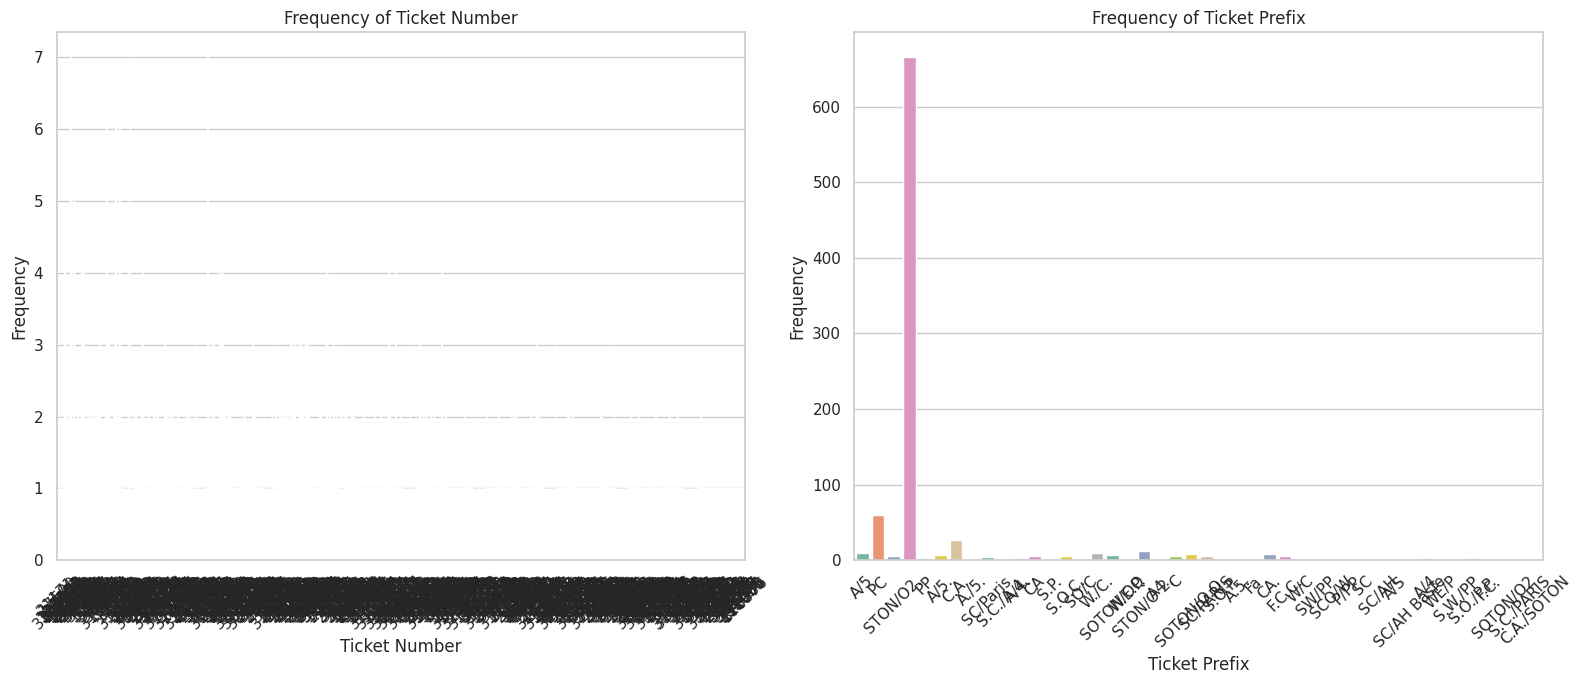

In [ ]:
plt.figure(figsize=(16, 7))  # Adjust the figure size as needed

# Plot for Ticket Number
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, select the first subplot
sns.countplot(data=train_df, x='Ticket Number', hue='Ticket Number', palette='Set1', legend=False)  # Adjust palette as needed
plt.xlabel('Ticket Number')
plt.ylabel('Frequency')
plt.title('Frequency of Ticket Number')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot for Ticket Prefix
plt.subplot(1, 2, 2)  # Select the second subplot
sns.countplot(data=train_df, x='Ticket Precode', hue='Ticket Precode', palette='Set2', legend=False)  # Adjust palette as needed
plt.xlabel('Ticket Prefix')
plt.ylabel('Frequency')
plt.title('Frequency of Ticket Prefix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
import pandas as pd

# Calculate survival rate
survival_rate = train_df.groupby(['Ticket Precode', 'Survived']).size().unstack(fill_value=0)
survival_rate['Survival Rate'] = survival_rate[1] / (survival_rate[0] + survival_rate[1])

# Print the survival rate table
#print("Survival Rate by Ticket Precode:")
#print(survival_rate)


Separate cabin number from cabin letter

In [ ]:
import pandas as pd
# Split the elements in 'Column1' and generate two new columns
train_df[['Cabin Letter', 'Cabin Number']] = train_df['Cabin'].str.extract(r'([A-Za-z]+)?(\d+)?', expand=True)

In [ ]:
# Condition 1: Column1 is not null and either Column2 or Column3 is not null
condition1 = ((train_df['Cabin'].isnull() &
               (train_df['Cabin Letter'].notnull() |
                train_df['Cabin Number'].notnull())) |
               (train_df['Cabin'].notnull() &
                (train_df['Cabin Letter'].isnull() &
                 train_df['Cabin Number'].isnull())))
result1 = train_df[condition1]


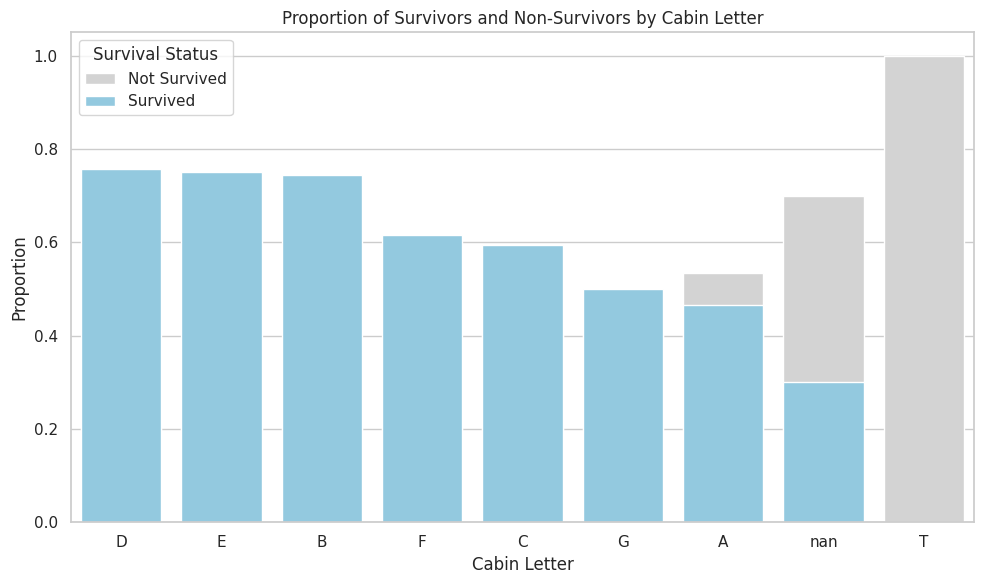

In [ ]:

# Step 3: Group data by cabin letter and calculate total passengers and survivors
cabin_survival_counts = train_df.groupby(['Cabin Letter', 'Survived']).size().unstack(fill_value=0)

# Calculate the proportions of survivors and non-survivors for each cabin letter
cabin_survival_proportions = cabin_survival_counts.div(cabin_survival_counts.sum(axis=1), axis=0)

# Sort the cabin letters based on the proportion of survivors
sorted_proportions = cabin_survival_proportions.sort_values(by=1, ascending=False)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_proportions.reset_index(), x='Cabin Letter', y=0, color='lightgrey', label='Not Survived')
sns.barplot(data=sorted_proportions.reset_index(), x='Cabin Letter', y=1, color='skyblue', label='Survived')
plt.xlabel('Cabin Letter')
plt.ylabel('Proportion')
plt.title('Proportion of Survivors and Non-Survivors by Cabin Letter')
plt.legend(title='Survival Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



How many of the tripulants are Married (Mr,Mrs, Mister)


In [ ]:
filtered_df =train_df[train_df['Age']=='Unknown']
filtered_df

#items_set={'Mrs','Mister','Mr','Miss','Master','Dr'}
items_set={'Miss'}
filtered_df = filtered_df[filtered_df['Name'].str.contains('|'.join(items_set), na=False, case=False)]

#filtered_df[filtered_df['Cabin'].str.contains('')==True]
filtered_df




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumCabins,Ticket Number,Ticket Precode,Cabin Letter,Cabin Number


Note:

In [ ]:
# Assuming df is your DataFrame
train_df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
display(train_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,NumCabins,Ticket Number,Ticket Precode,Cabin Letter,Cabin Number
0,0,3,1,22.0,1,0,7.2500,nan,Southampton,1,21171,A/5,nan,NaN
1,1,1,0,38.0,1,0,71.2833,C85,Cherbourg,1,17599,PC,C,85
2,1,3,0,26.0,0,0,7.9250,nan,Southampton,1,3101282,STON/O2.,nan,NaN
3,1,1,0,35.0,1,0,53.1000,C123,Southampton,1,113803,,C,123
4,0,3,1,35.0,0,0,8.0500,nan,Southampton,1,373450,,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,nan,Southampton,1,211536,,nan,NaN
887,1,1,0,19.0,0,0,30.0000,B42,Southampton,1,112053,,B,42
888,0,3,0,NaN,1,2,23.4500,nan,Southampton,1,6607,W./C.,nan,NaN
889,1,1,1,26.0,0,0,30.0000,C148,Cherbourg,1,111369,,C,148


#Feature Engineering
Handling missing values

###Imputation:
- Rows with empty ages filled with median  
- Remove Cabin Column
- Remove Cabin Number and Cabin LetterIm

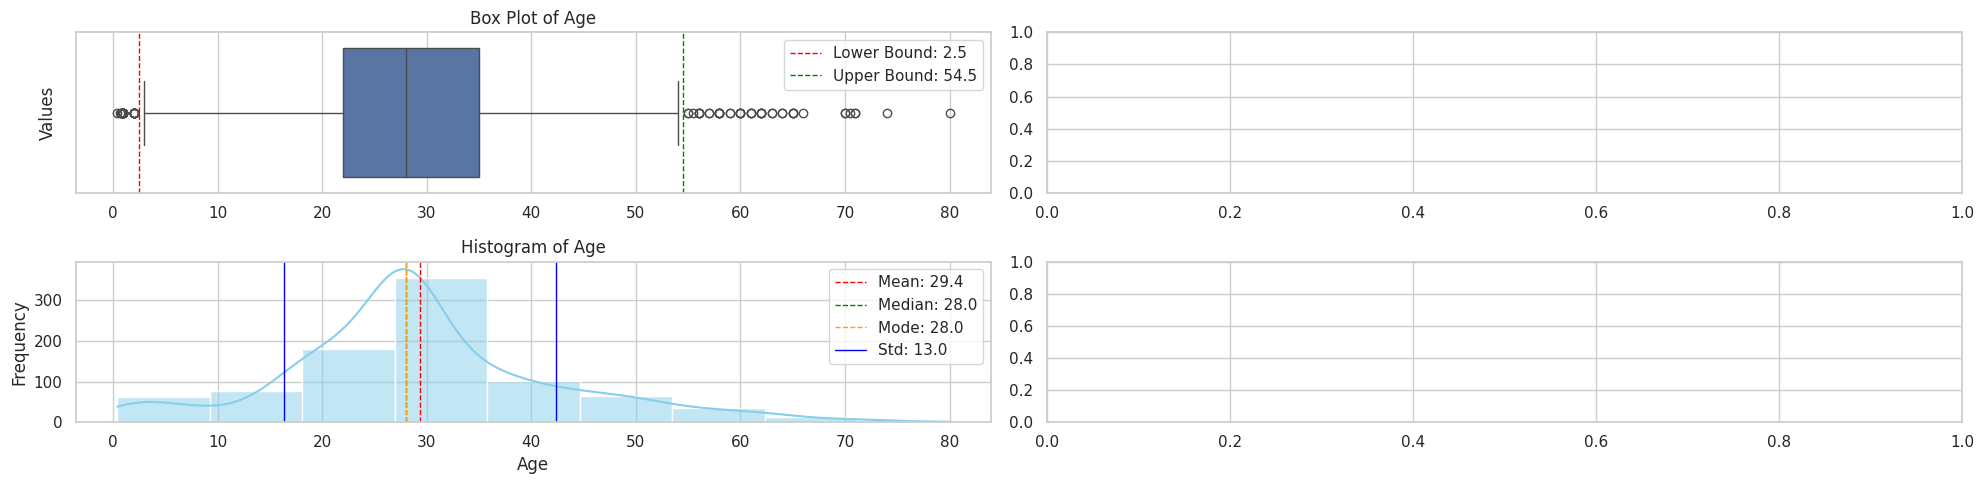

In [ ]:
# Calculate the median age
median_age = train_df['Age'].median()

# Fill missing values in the "Age" column with the median age
train_df['Age'].fillna(median_age, inplace=True)

# List of numerical variables
numerical_variables = ['Age']

# Create a figure with a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 5))

# Iterate over each numerical variable
for i, column in enumerate(numerical_variables):
    numeric_values = pd.to_numeric(train_df[column], errors='coerce').dropna()

     # Calculate lower bound and upper bound
    Q1 = numeric_values.quantile(0.25)
    Q3 = numeric_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add box plot to the subplot in the first row
    sns.boxplot(x=train_df[column], ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {column}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Values')

    # Plot vertical lines for lower bound and upper bound
    axes[0, i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.1f}')
    axes[0, i].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.1f}')

    # Add legend to the box plot
    axes[0, i].legend()

    # Add histogram with distribution plot to the subplot in the second row
    sns.histplot(train_df[column], kde=True, color='skyblue', bins=9, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')

    # Calculate mean, median, mode, and standard deviation
    mean_ = train_df[column].mean()
    median_ = train_df[column].median()
    mode_ = train_df[column].mode().values[0]
    std_ = train_df[column].std()

    # Plot vertical lines for mean, median, mode, and standard deviation on the histogram subplot
    axes[1, i].axvline(mean_, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_:.1f}')
    axes[1, i].axvline(median_, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_:.1f}')
    axes[1, i].axvline(mode_, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_:.1f}')
    axes[1, i].axvline(mean_ + std_, color='blue', linestyle='solid', linewidth=1, label=f'Std: {std_:.1f}')
    axes[1, i].axvline(mean_ - std_, color='blue', linestyle='solid', linewidth=1)

    # Add legend to the histogram subplot
    axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Check Cabin null values

More than 77% of the data from the column Cabin is NaN.

In [ ]:
# Assuming 'df' is your DataFrame
train_df.drop(columns=['Cabin','Cabin Letter','Cabin Number','Ticket Precode'], inplace=True)


In [ ]:
display(train_df[train_df['Ticket Number']!=''])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumCabins,Ticket Number
0,0,3,1,22.0,1,0,7.2500,Southampton,1,21171
1,1,1,0,38.0,1,0,71.2833,Cherbourg,1,17599
2,1,3,0,26.0,0,0,7.9250,Southampton,1,3101282
3,1,1,0,35.0,1,0,53.1000,Southampton,1,113803
4,0,3,1,35.0,0,0,8.0500,Southampton,1,373450
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,Southampton,1,211536
887,1,1,0,19.0,0,0,30.0000,Southampton,1,112053
888,0,3,0,28.0,1,2,23.4500,Southampton,1,6607
889,1,1,1,26.0,0,0,30.0000,Cherbourg,1,111369


In [ ]:
train_df['SibSb_log+1'] = (train_df['SibSp']+1).transform(np.log)
train_df['SibSp_logx+c'] = np.log(train_df['SibSp'] - min(train_df['SibSp']) + 1)


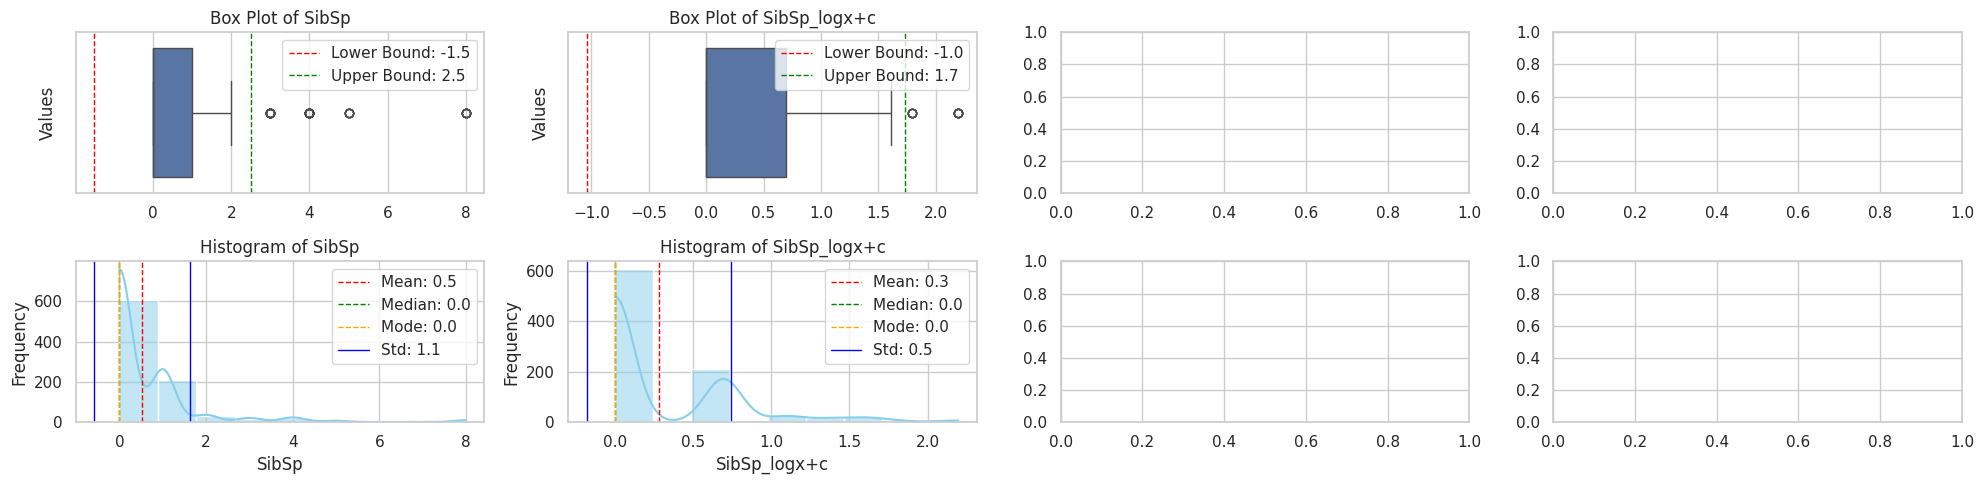

In [ ]:
# List of numerical variables
numerical_variables = ['SibSp','SibSp_logx+c']

# Create a figure with a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

# Iterate over each numerical variable
for i, column in enumerate(numerical_variables):
    numeric_values = pd.to_numeric(train_df[column], errors='coerce').dropna()

     # Calculate lower bound and upper bound
    Q1 = numeric_values.quantile(0.25)
    Q3 = numeric_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add box plot to the subplot in the first row
    sns.boxplot(x=train_df[column], ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {column}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Values')

    # Plot vertical lines for lower bound and upper bound
    axes[0, i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.1f}')
    axes[0, i].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.1f}')

    # Add legend to the box plot
    axes[0, i].legend()

    # Add histogram with distribution plot to the subplot in the second row
    sns.histplot(train_df[column], kde=True, color='skyblue', bins=9, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')

    # Calculate mean, median, mode, and standard deviation
    mean_ = train_df[column].mean()
    median_ = train_df[column].median()
    mode_ = train_df[column].mode().values[0]
    std_ = train_df[column].std()

    # Plot vertical lines for mean, median, mode, and standard deviation on the histogram subplot
    axes[1, i].axvline(mean_, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_:.1f}')
    axes[1, i].axvline(median_, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_:.1f}')
    axes[1, i].axvline(mode_, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_:.1f}')
    axes[1, i].axvline(mean_ + std_, color='blue', linestyle='solid', linewidth=1, label=f'Std: {std_:.1f}')
    axes[1, i].axvline(mean_ - std_, color='blue', linestyle='solid', linewidth=1)

    # Add legend to the histogram subplot
    axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
train_df['SibSb_sqrt-min+1'] = np.sqrt(train_df['SibSp'] - train_df['SibSp'].min() + 1)

In [ ]:
train_df[raw_train_df['SibSp']>1.7]

# Calculate the upper bound for Age
upper_bound_age = train_df['SibSp'].quantile(0.75) + 1.5 * (train_df['SibSp'].quantile(0.75) - train_df['SibSp'].quantile(0.25))

# Replace outliers with the upper bound
train_df['SibSb_upperbound'] = np.where(train_df['SibSp'] > upper_bound_age, upper_bound_age, train_df['SibSp'])

# Show the DataFrame with outliers replaced



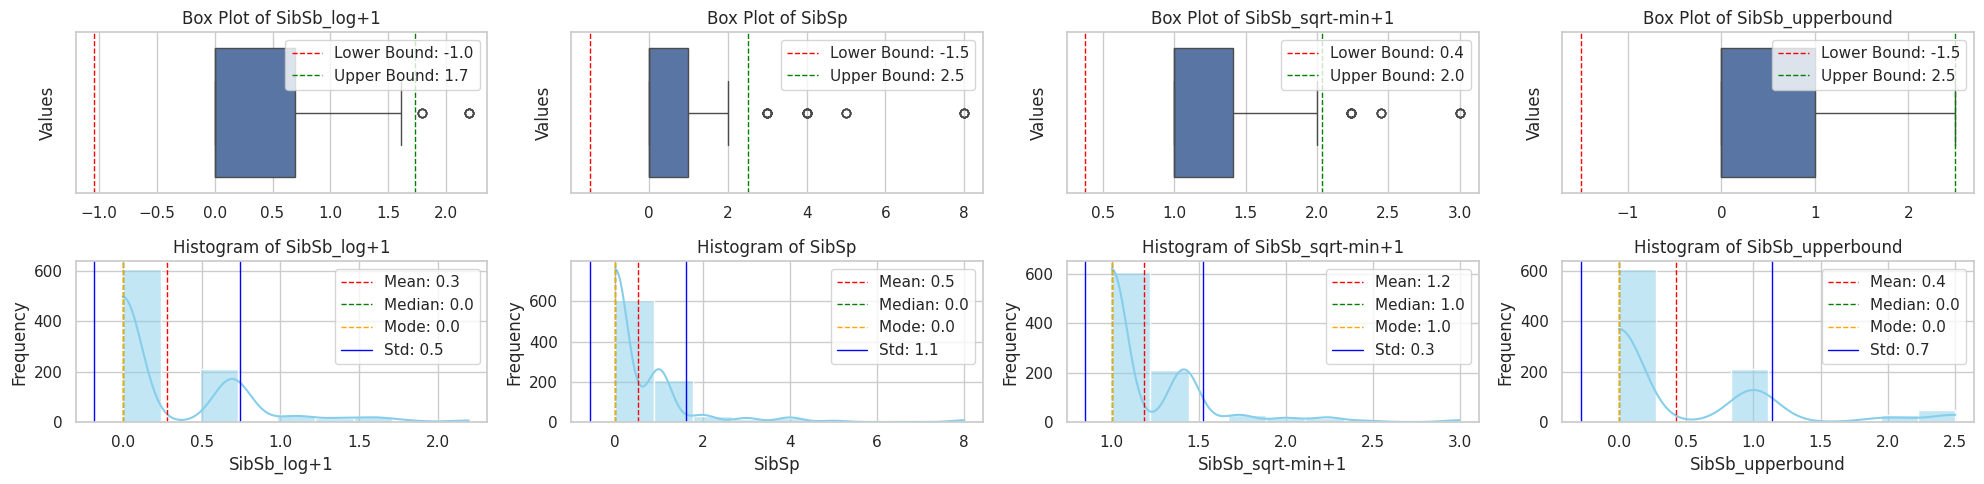

In [ ]:
# List of numerical variables
numerical_variables = ['SibSb_log+1','SibSp','SibSb_sqrt-min+1','SibSb_upperbound']

# Create a figure with a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

# Iterate over each numerical variable
for i, column in enumerate(numerical_variables):
    numeric_values = pd.to_numeric(train_df[column], errors='coerce').dropna()

     # Calculate lower bound and upper bound
    Q1 = numeric_values.quantile(0.25)
    Q3 = numeric_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add box plot to the subplot in the first row
    sns.boxplot(x=train_df[column], ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {column}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Values')

    # Plot vertical lines for lower bound and upper bound
    axes[0, i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.1f}')
    axes[0, i].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.1f}')

    # Add legend to the box plot
    axes[0, i].legend()

    # Add histogram with distribution plot to the subplot in the second row
    sns.histplot(train_df[column], kde=True, color='skyblue', bins=9, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')

    # Calculate mean, median, mode, and standard deviation
    mean_ = train_df[column].mean()
    median_ = train_df[column].median()
    mode_ = train_df[column].mode().values[0]
    std_ = train_df[column].std()

    # Plot vertical lines for mean, median, mode, and standard deviation on the histogram subplot
    axes[1, i].axvline(mean_, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_:.1f}')
    axes[1, i].axvline(median_, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_:.1f}')
    axes[1, i].axvline(mode_, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_:.1f}')
    axes[1, i].axvline(mean_ + std_, color='blue', linestyle='solid', linewidth=1, label=f'Std: {std_:.1f}')
    axes[1, i].axvline(mean_ - std_, color='blue', linestyle='solid', linewidth=1)

    # Add legend to the histogram subplot
    axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
train_df['SibSb_Cube_Root'] = np.cbrt(train_df['SibSp'] - min(train_df['SibSp']) + 1)

In [ ]:
train_df['SibSb_Reciprocal'] = 1 / (train_df['SibSp'] - min(train_df['SibSp']) + 1)

In [ ]:
train_df['SibSb_exp'] = np.exp(train_df['SibSp'] - min(train_df['SibSp']) + 1)

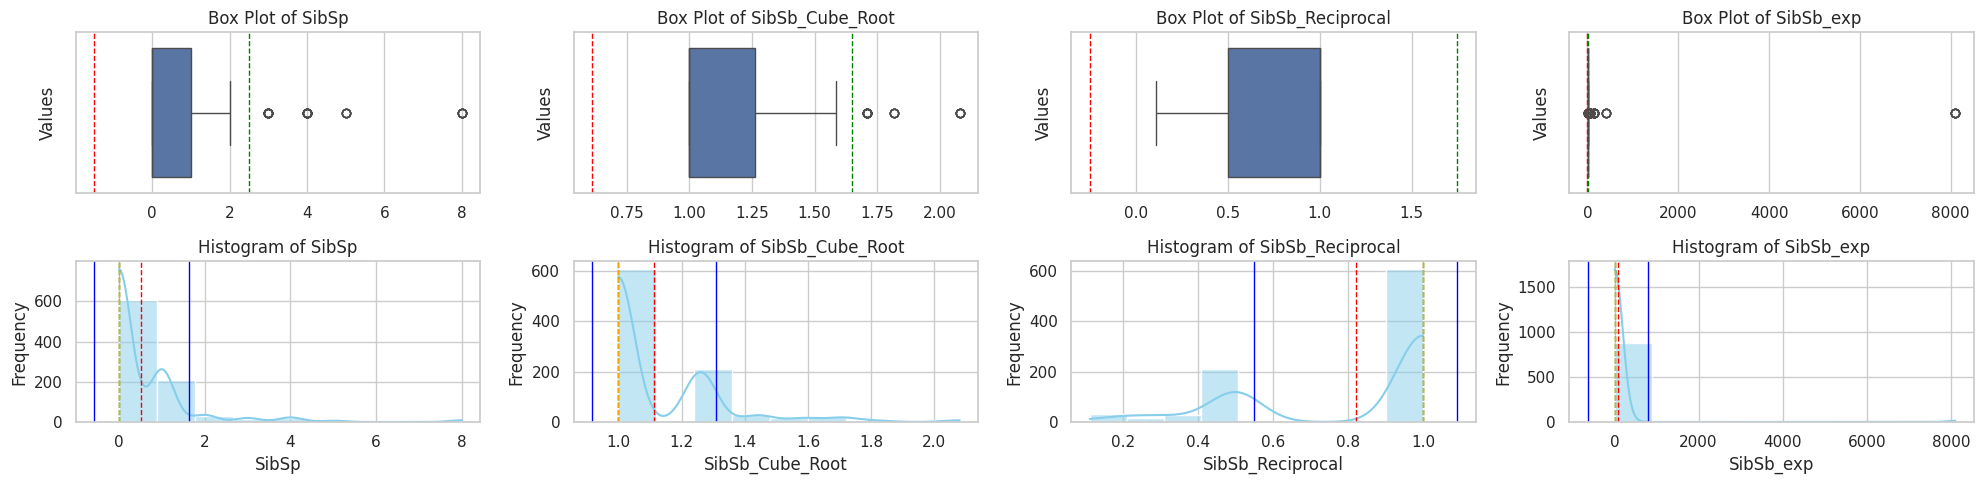

In [ ]:
# List of numerical variables
numerical_variables = ['SibSp','SibSb_Cube_Root','SibSb_Reciprocal','SibSb_exp']

# Create a figure with a subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 5))

# Iterate over each numerical variable
for i, column in enumerate(numerical_variables):
    numeric_values = pd.to_numeric(train_df[column], errors='coerce').dropna()

     # Calculate lower bound and upper bound
    Q1 = numeric_values.quantile(0.25)
    Q3 = numeric_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Add box plot to the subplot in the first row
    sns.boxplot(x=train_df[column], ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {column}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Values')

    # Plot vertical lines for lower bound and upper bound
    axes[0, i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.1f}')
    axes[0, i].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.1f}')

    # Add legend to the box plot
   # axes[0, i].legend()

    # Add histogram with distribution plot to the subplot in the second row
    sns.histplot(train_df[column], kde=True, color='skyblue', bins=9, ax=axes[1, i])
    axes[1, i].set_title(f'Histogram of {column}')
    axes[1, i].set_xlabel(column)
    axes[1, i].set_ylabel('Frequency')

    # Calculate mean, median, mode, and standard deviation
    mean_ = train_df[column].mean()
    median_ = train_df[column].median()
    mode_ = train_df[column].mode().values[0]
    std_ = train_df[column].std()

    # Plot vertical lines for mean, median, mode, and standard deviation on the histogram subplot
    axes[1, i].axvline(mean_, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_:.1f}')
    axes[1, i].axvline(median_, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_:.1f}')
    axes[1, i].axvline(mode_, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_:.1f}')
    axes[1, i].axvline(mean_ + std_, color='blue', linestyle='solid', linewidth=1, label=f'Std: {std_:.1f}')
    axes[1, i].axvline(mean_ - std_, color='blue', linestyle='solid', linewidth=1)

    # Add legend to the histogram subplot
    #axes[1, i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




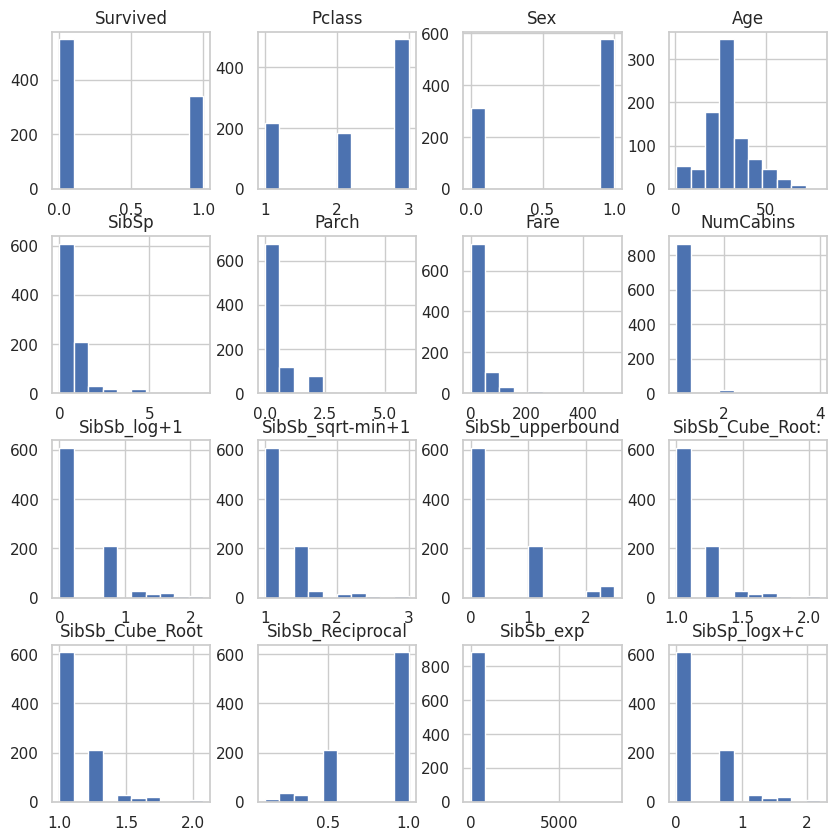

In [ ]:
train_df.hist(figsize=(10, 10))
plt.show()